# Pandas tutorial for Asia University

In [1]:
import pandas as pd
import numpy as np

In [2]:
dat = pd.read_csv('Pokemon/Pokemon_g1.csv', encoding = 'Windows-1252')

In [3]:
dat.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


# Groupby

- [官方文件](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [7]:
dat.groupby('Type 1', as_index=False).Attack.mean()

,Type 1,Attack
0,Bug,76.428571
1,Dragon,94.000000
2,Electric,62.000000
3,Fairy,57.500000
4,Fighting,102.857143
5,Fire,88.642857
6,Ghost,53.750000
7,Grass,72.923077
8,Ground,81.875000
9,Ice,67.500000


### 動手試試看
- 請計算各個屬性(Type 1)在能力總和(Total)上的平均值，以及速度(Speed)的最小值，並依照能力總和平均由大排到小

---

# Merge, Join, and Concatenate

[Merge, join, and concatenate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)

In [5]:
dat_extra = pd.read_csv('Pokemon/Pokemon_g1_extra.csv', encoding = 'Windows-1252')

In [6]:
dat_extra.head()

,#,Name,Generation,Legendary
0,1,Bulbasaur,1,False
1,2,Ivysaur,1,False
2,3,Venusaur,1,False
3,3,VenusaurMega Venusaur,1,False
4,4,Charmander,1,False


In [13]:
# 根據index 來增加欄位

dat.join(dat_extra[['Generation', 'Legendary']]).head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
# 根據兩份資料的特定欄位數值來合併資料，與SQL join 類似

merge_dat = pd.merge(dat, dat_extra, on = 'Name')

merge_dat.head()

,#_x,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,#_y,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,3,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,4,1,False


In [21]:
# concat 可以指定增加欄位或是資料筆數，但會直接以原本的排序下去合併，不會做欄位的對應
concate_data = [dat[0:5], dat[10:15]]

pd.concat( concate_data, axis = 0)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65
10,8,Wartortle,Water,NaN,405,59,63,80,65,80,58
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78
13,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45
14,11,Metapod,Bug,NaN,205,50,20,55,25,25,30


In [22]:
# concat 可以指定增加欄位或是資料筆數，但會直接以原本的排序下去合併，不會做欄位的對應
concate_data = [dat[['Name']], dat['Speed']]

pd.concat(concate_data, axis = 1).head()

,Name,Speed
0,Bulbasaur,45
1,Ivysaur,60
2,Venusaur,80
3,VenusaurMega Venusaur,80
4,Charmander,65


### 動手試試看

- 下方已經準備好兩份資料(分別記錄了班上同學的作業分數與期中考分數)，請將此兩份資料合併起來

In [28]:
class_dat_1 = pd.DataFrame({'ID':['B0971204','B0981142','B0972830','B0996029'],
                            'homework':[90, 85, 76, 88]})
class_dat_2 = pd.DataFrame({'ID':['B0996029','B0972830','B0981142','B1003852'],
                            'midterm':[63, 80, 93, 85]})

---

# Apply

In [35]:
dat.loc[:,'Total':'Speed'].apply(np.mean, axis = 0)

Total      425.445783
HP          65.885542
Attack      76.536145
Defense     70.861446
Sp. Atk     71.819277
Sp. Def     69.150602
Speed       72.289157
dtype: float64

In [39]:
def grade(row):
    if (row['Attack']>100)|(row['Sp. Atk']>100):
        return 'awesome'
    elif (row['Attack']>80)&(row['Speed']>80):
        return 'awesome'
    elif (row['Defense']>60)|(row['HP']>60):
        return 'good'
    else:
        return 'soso'

dat_2 = dat.copy()

dat_2['grade'] = dat_2.apply(grade, axis = 1)

dat_2.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,grade
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,soso
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,good
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,good
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,awesome
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,soso


### 動手試試看
請計算出各個屬性(Type 1)中有幾隻神奇寶貝速度(Speed)在60以下

---

# Cross_table, pivot_table, and melt

In [43]:
pd.crosstab(dat_2['Type 1'], dat_2['grade'])

grade,awesome,good,soso
Type 1,,,
Bug,4,3,7
Dragon,1,1,1
Electric,5,2,2
Fairy,0,2,0
Fighting,4,2,1
Fire,9,1,4
Ghost,3,0,1
Grass,4,6,3
Ground,1,5,2


In [44]:
dat_2.pivot_table(values='Total', index='Type 1', columns='grade', aggfunc=np.mean)

grade,awesome,good,soso
Type 1,,,
Bug,523.750000,416.666667,255.000000
Dragon,600.000000,420.000000,300.000000
Electric,509.000000,402.500000,325.000000
Fairy,NaN,403.000000,NaN
Fighting,467.500000,355.000000,305.000000
Fire,540.777778,505.000000,340.750000
Ghost,501.666667,NaN,310.000000
Grass,531.250000,412.500000,312.666667
Ground,485.000000,368.000000,335.000000


In [59]:
pivot_dat = dat_2.pivot_table(values='Total', index='Type 1', columns='grade', aggfunc=np.mean)
pivot_dat.reset_index(inplace = True)

pivot_dat.head()

grade,Type 1,awesome,good,soso
0,Bug,523.75,416.666667,255.0
1,Dragon,600.00,420.000000,300.0
2,Electric,509.00,402.500000,325.0
3,Fairy,NaN,403.000000,NaN
4,Fighting,467.50,355.000000,305.0


In [61]:
pivot_dat.melt(id_vars=['Type 1'], value_vars=['awesome','good','soso']).head(20)

,Type 1,grade,value
0,Bug,awesome,523.750000
1,Dragon,awesome,600.000000
2,Electric,awesome,509.000000
3,Fairy,awesome,NaN
4,Fighting,awesome,467.500000
5,Fire,awesome,540.777778
6,Ghost,awesome,501.666667
7,Grass,awesome,531.250000
8,Ground,awesome,485.000000
9,Ice,awesome,517.500000


### 動手試試看
下方已幫各位合併了dat_2 與 dat_extra 兩資料，請以傳說與否(Legendary)為row、評分(grade)為column並計算Speed的最大值

In [62]:
def grade(row):
    if (row['Attack']>100)|(row['Sp. Atk']>100):
        return 'awesome'
    elif (row['Attack']>80)&(row['Speed']>80):
        return 'awesome'
    elif (row['Defense']>60)|(row['HP']>60):
        return 'good'
    else:
        return 'soso'

dat_2 = dat.copy()
dat_2['grade'] = dat_2.apply(grade, axis = 1)

dat_extra = pd.read_csv('Pokemon/Pokemon_g1_extra.csv', encoding = 'Windows-1252')

In [64]:
dat_merge = pd.merge(dat_2, dat_extra.drop('#', axis = 1), on = 'Name')
dat_merge.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,grade,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,soso,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,good,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,good,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,awesome,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,soso,1,False


---

# Plot

### histogram

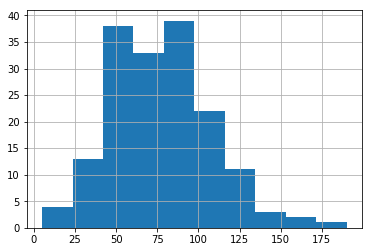

In [46]:
dat['Attack'].hist()

### barplot

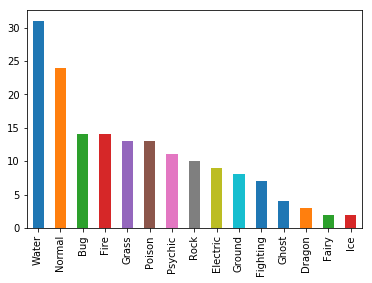

In [49]:
type_counts = dat['Type 1'].value_counts()

type_counts.plot.bar()

### scatter plot

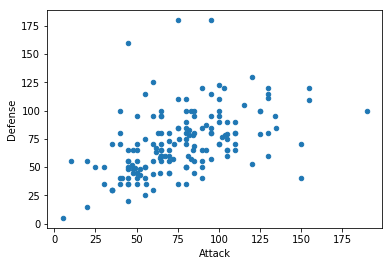

In [50]:
dat.plot.scatter('Attack','Defense')

---

# 寫出檔案

In [ ]:
dat.to_csv('out_data.csv', index = False)